Load the `tidyverse`. 📊

In [63]:
library('tidyverse')

Run the following cell to get the CDC vaccination data. 

In [6]:
 vax_data = read_csv(
     "covid19_vaccinations_in_the_united_states.csv", 
     na = 'N/A',
     col_types = cols()
)

What columns are in the data set? 


(**Hint:** for wide tables like this it can be useful to just print the column names using the `colnames` function—can you figure out how to use `colnames` from its documentation?)

In [7]:
colnames(vax_data)

[1] "State/Territory/Federal Entity"                                    
 [2] "Total Doses Delivered"                                             
 [3] "Doses Delivered per 100K"                                          
 [4] "18+ Doses Delivered per 100K"                                      
 [5] "Total Doses Administered by State where Administered"              
 [6] "Doses Administered per 100k by State where Administered"           
 [7] "18+ Doses Administered by State where Administered"                
 [8] "18+ Doses Administered per 100K by State where Administered"       
 [9] "People with at least One Dose by State of Residence"               
[10] "Percent of Total Pop with at least One Dose by State of Residence" 
[11] "People 18+ with at least One Dose by State of Residence"           
[12] "Percent of 18+ Pop with at least One Dose by State of Residence"   
[13] "People Fully Vaccinated by State of Residence"                     
[14] "Percent of Total Pop Fully Vaccinated by State of Residence"       
[15] "People 18+ Fully Vaccinated by State of Residence"                 
[16] "Percent of 18+ Pop Fully Vaccinated by State of Residence"         
[17] "Total Number of Pfizer doses delivered"                            
[18] "Total Number of Moderna doses delivered"                           
[19] "Total Number of Janssen doses delivered"                           
[20] "Total Number of doses from unknown manufacturer delivered"         
[21] "Total Number of Janssen doses administered"                        
[22] "Total Number of Moderna doses administered"                        
[23] "Total Number of Pfizer doses adminstered"                          
[24] "Total Number of doses from unknown manufacturer administered"      
[25] "People Fully Vaccinated Moderna Resident"                          
[26] "People Fully Vaccinated Pfizer Resident"                           
[27] "People Fully Vaccinated Janssen Resident"                          
[28] "People Fully Vaccinated Unknown 2-dose manufacturer Resident"      
[29] "People 18+ Fully Vaccinated Moderna Resident"                      
[30] "People 18+ Fully Vaccinated Pfizer Resident"                       
[31] "People 18+ Fully Vaccinated Janssen Resident"                      
[32] "People 18+ Fully Vaccinated Unknown 2-dose manufacturer Resident"  
[33] "People with 2 Doses by State of Residence"                         
[34] "Percent of Total Pop with 1+ Doses by State of Residence"          
[35] "People 18+ with 1+ Doses by State of Residence"                    
[36] "Percent of 18+ Pop with 1+ Doses by State of Residence"            
[37] "Percent of Total Pop with 2 Doses by State of Residence"           
[38] "People 18+ with 2 Doses by State of Residence"                     
[39] "Percent of 18+ Pop with 2 Doses by State of Residence"             
[40] "People with 1+ Doses by State of Residence"                        
[41] "People 65+ with at least One Dose by State of Residence"           
[42] "Percent of 65+ Pop with at least One Dose by State of Residence"   
[43] "People 65+ Fully Vaccinated by State of Residence"                 
[44] "Percent of 65+ Pop Fully Vaccinated by State of Residence"         
[45] "People 65+ Fully Vaccinated_Moderna_Resident"                      
[46] "People 65+ Fully Vaccinated_Pfizer_Resident"                       
[47] "People 65+ Fully Vaccinated_Janssen_Resident"                      
[48] "People 65+ Fully Vaccinated_Unknown 2-dose Manuf_Resident"         
[49] "65+ Doses Administered by State where Administered"                
[50] "Doses Administered per 100k of 65+ pop by State where Administered"
[51] "Doses Delivered per 100k of 65+ pop"                               
[52] "People 12+ with at least One Dose by State of Residence"           
[53] "Percent of 12+ Pop with at least One Dose by State of Residence"   
[54] "People 12+ Fully Vaccinated by State of Residence"                 
[55] 

Make a histogram (with a rug) of 18+ at-least-one-dose vaccination rates (percent) for all states. **When you're working with a column name that has spaces, you need to wrap it in back ticks \`\`.**

Like this:

```R
aes(x = `some column name with spaces`)
```

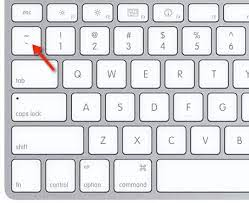

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


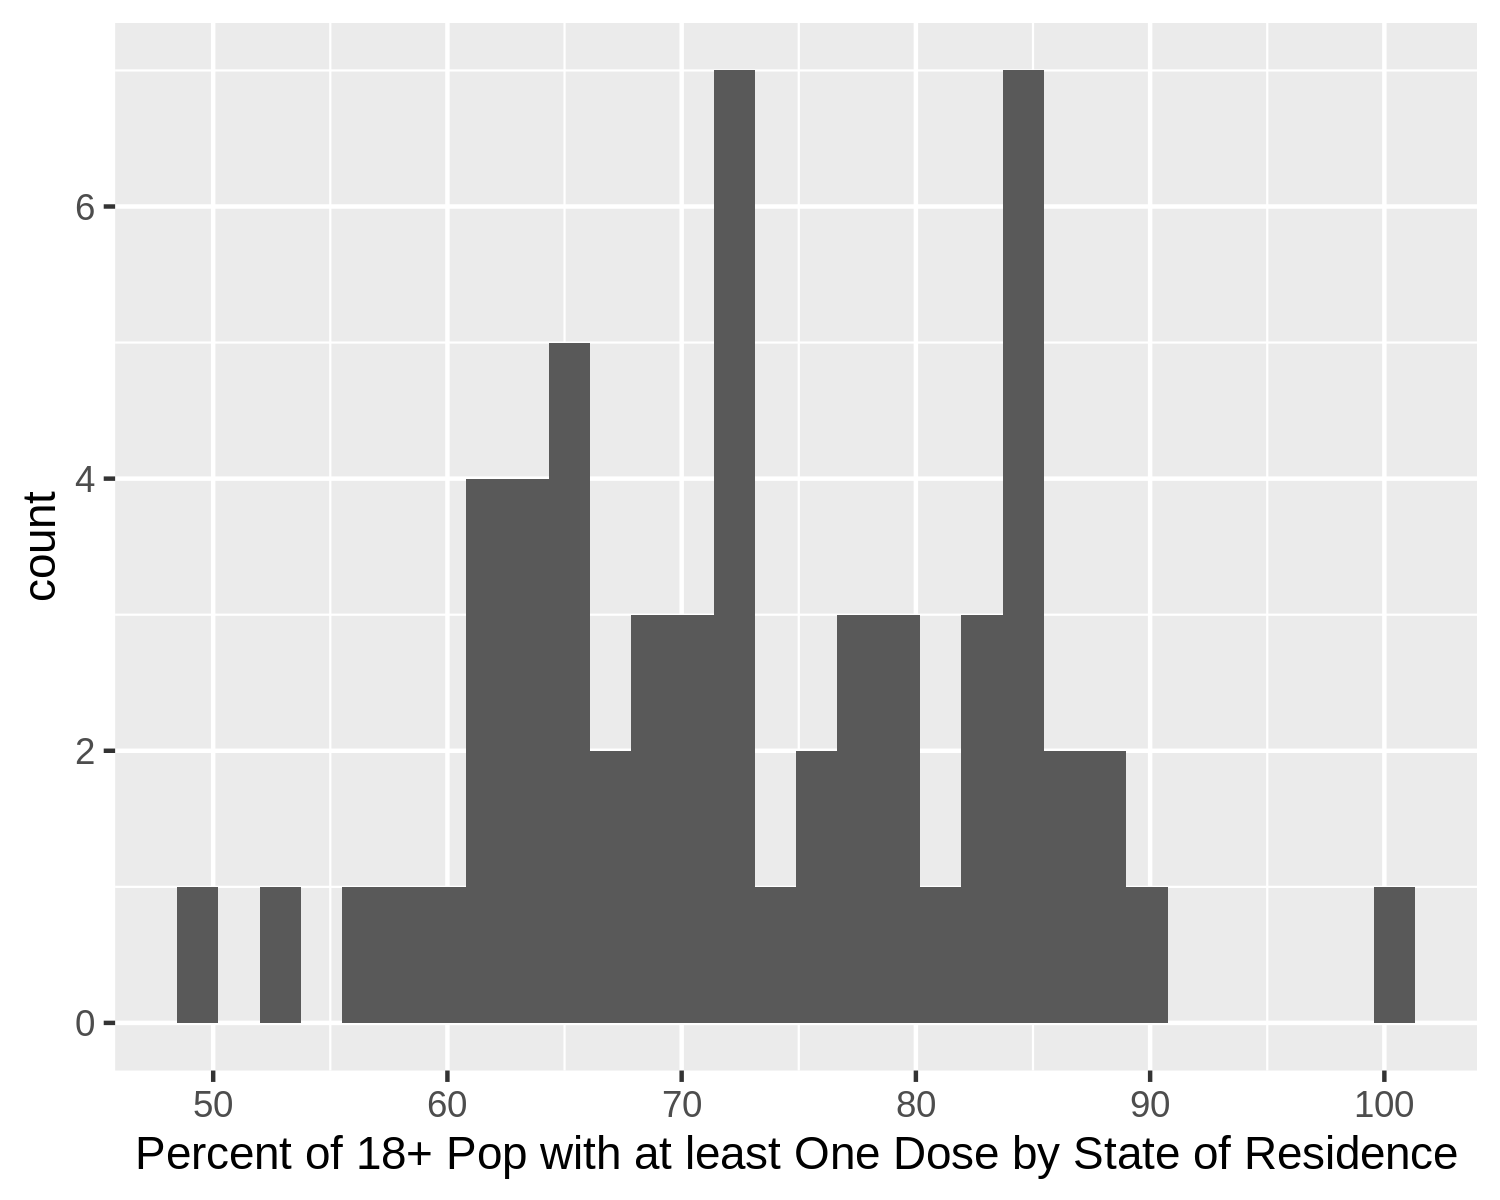

In [8]:

p = ggplot (vax_data, aes(x= `Percent of 18+ Pop with at least One Dose by State of Residence`))

p = p + geom_histogram()

p

The code below will pull out the vaccination rate for North Carolina.

In [29]:
 vax_data %>%
     filter(`State/Territory/Federal Entity` == "North Carolina") %>%
     pull(`Percent of 18+ Pop with at least One Dose by State of Residence`) %>%
     paste("of 18 or older North Carolinians have at least 1 dose")

[1] "69.4 of 18 or older North Carolinians have at least 1 dose"

Can you use `geom_vline` to add a vertical line representing the position of NC's vaccination rate to your histogram? What arguments does `geom_vline` take?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


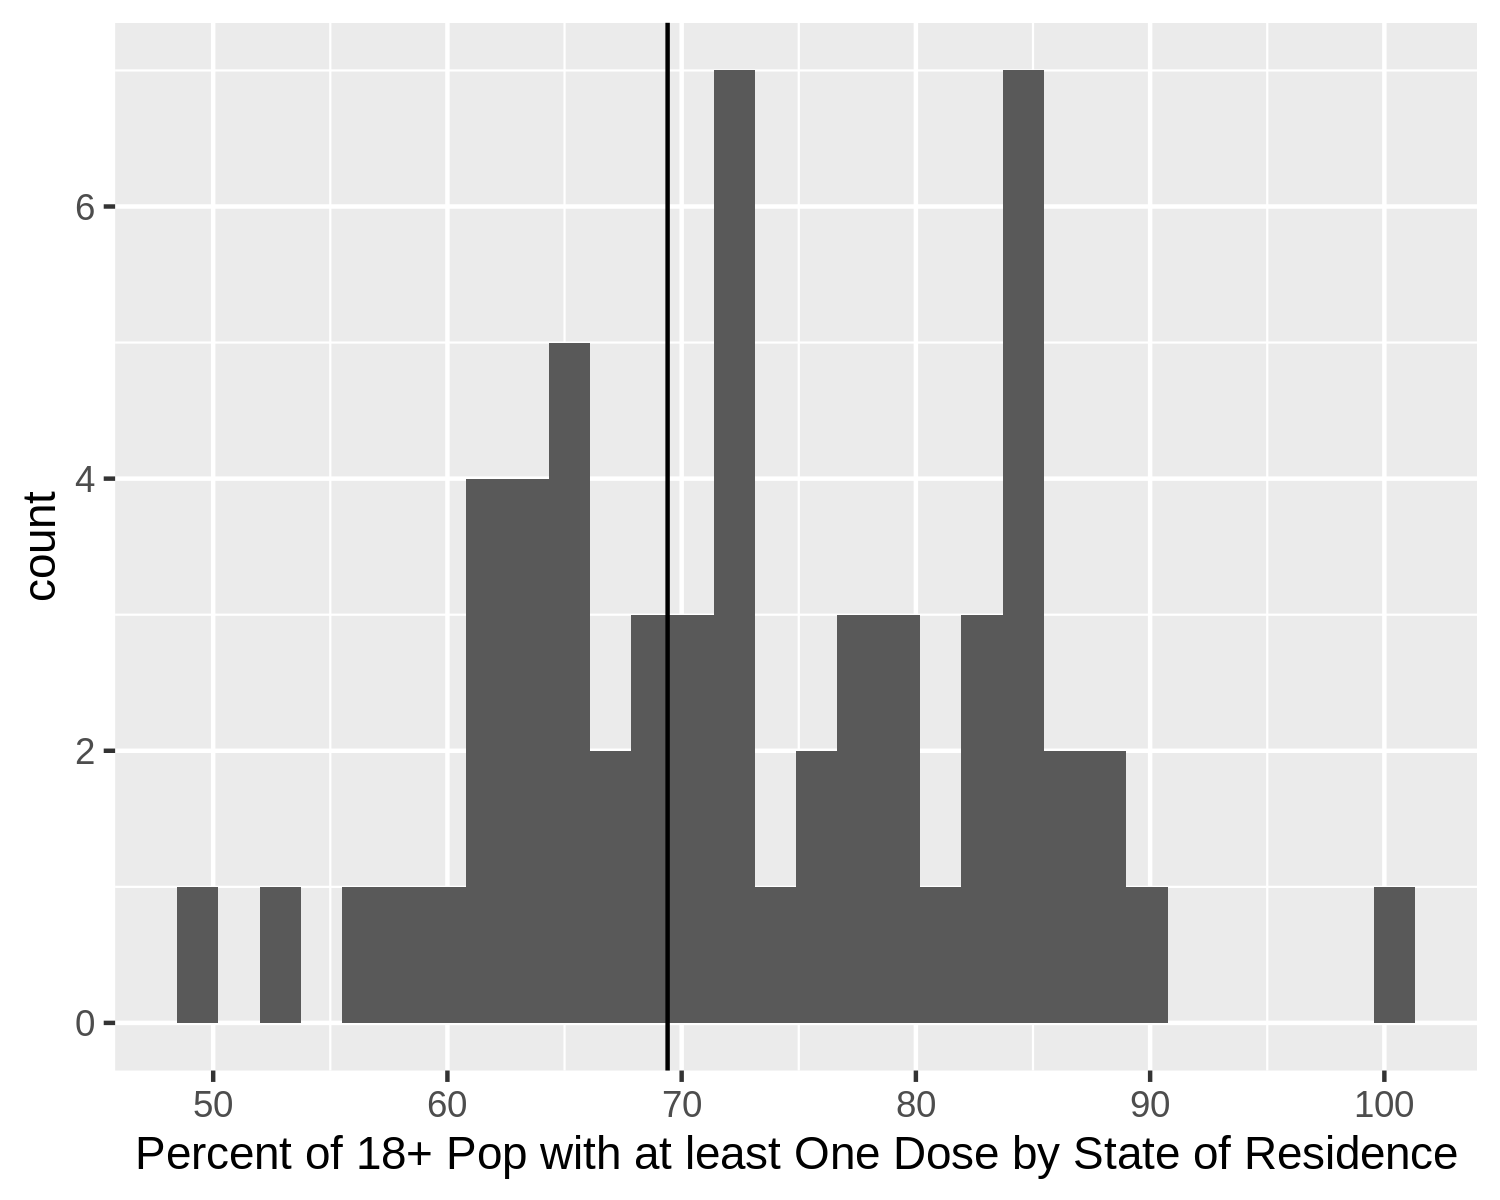

In [10]:
p + geom_vline(xintercept = 69.4)

In [44]:
vax_data_long = vax_data %>%

    rename(perc_18plus_one_dose = `Percent of 18+ Pop with at least One Dose by State of Residence`,
           perc_18plus_two_dose = `Percent of 18+ Pop with 2 Doses by State of Residence`) %>% 

    select(perc_18plus_one_dose, perc_18plus_two_dose, `State/Territory/Federal Entity`) %>%

    pivot_longer(cols = c("perc_18plus_one_dose", "perc_18plus_two_dose"), 
                 values_to = 'percent', 
                 names_to = 'dose_number')

    
    

In [45]:
vax_data_long %>% head

State/Territory/Federal Entity,dose_number,percent
<chr>,<chr>,<dbl>
Alaska,perc_18plus_one_dose,68.9
Alaska,perc_18plus_two_dose,54.6
Alabama,perc_18plus_one_dose,62.7
Alabama,perc_18plus_two_dose,46.2
Arkansas,perc_18plus_one_dose,66.4
Arkansas,perc_18plus_two_dose,49.7


In [46]:
vax_data_long = vax_data %>%

    mutate(nc = ifelse(`State/Territory/Federal Entity` == 'North Carolina', 'yes', 'no' ))

In [ ]:
library('ggrepel')

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'percent' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(

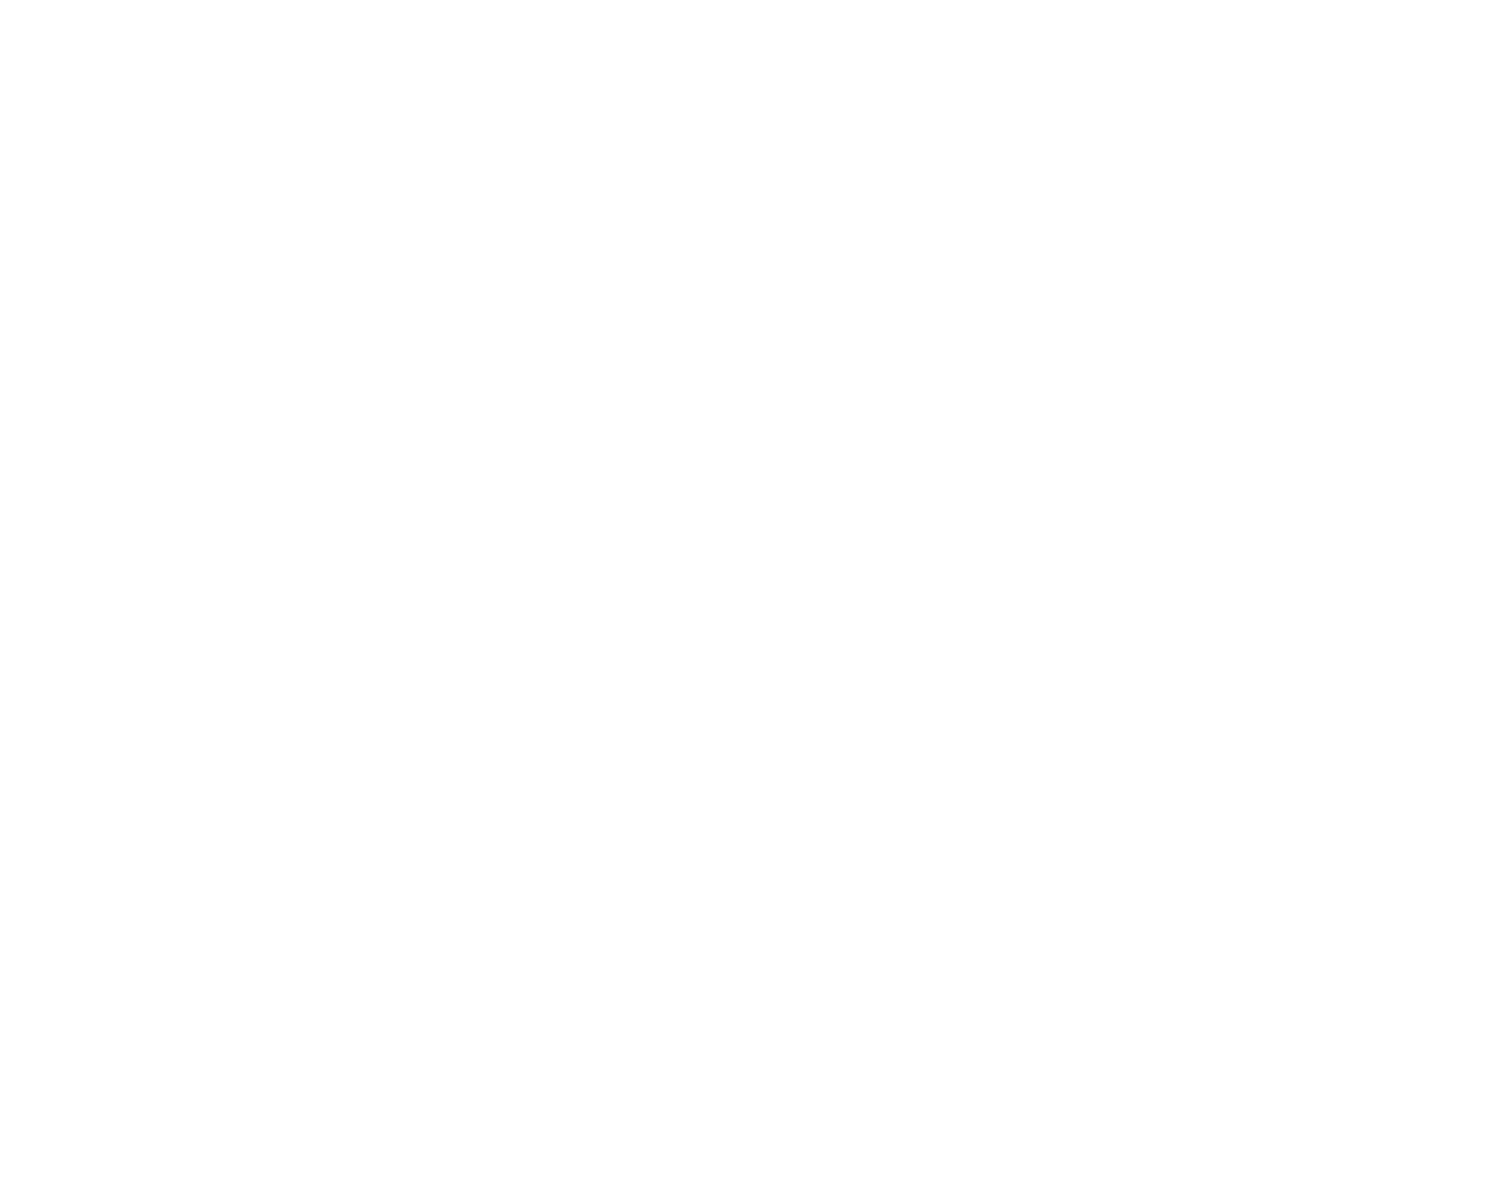

In [48]:
p = ggplot(vax_data_long, aes(x = percent, y = dose_number, color = nc))

p = p + geom_point(position = position_jitter(w = 0, h = 0.2) color = 'grey70', data = data_vax_long %>% filter(nc=='no'))

p = p + geom_point(data = vax_data_long %>% filter (nc == 'yes', color = 'red'))

p = p + geom_text_repel(data = vax_data_long %>% filter(nc == 'yes'))


p

🛑 **Stop here** 🛑

Use `percent_format` function from the `scales` and `scale_x_continuous` package to update the `x-axis` labels to percent formatting.

Make the same chart with a different theme (E.g. try `theme_minimal`).